#1

In order to build a loitering universe, I used the parameters given in the text: $\Omega_M = 0.3$, and $\Omega_{\Lambda}=1.7134$. $\Omega_R$ was taken to be insignificantly small, and was assigned 0.0001 simply for inclusion's sake. 

The method for finding the scale factor in terms of time involved numerically solving the integral

$\int_0^a\frac{da}{(\Omega_{r,0}/a^2+\Omega_{m,0}/a+\Omega_{\Lambda,0}a^2+(1-\Omega_0))^{1/2}}=H_0t$

for values of the scale factor ranging from zero to 2.5. The resulting figure shown below matches the one shown in the text, having the scale factor loiter around $a\approx0.44$.


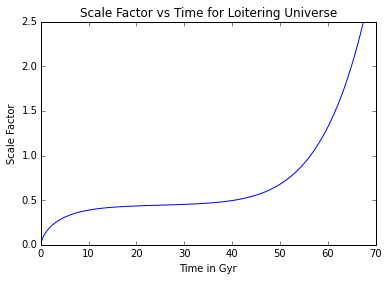

In [25]:
%matplotlib inline

import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

#define parameters in SI units
H0 = 2.27e-18
c = 3.0e-8

#define critical densities for loitering universe
OmegaR = 0.0001
OmegaM = 0.3
OmegaL = 1.7134
Omega0 = OmegaM + OmegaL + OmegaR

#define integrand
integrand = lambda A: (OmegaR/(A**2)+OmegaM/A+OmegaL*(A**2)+(1-Omega0))**(-0.5)

#define t function
def t(a):
    return integrate.quad(integrand, 0, a)[0]/H0

#define parameters for array dimensions
aMax = 2.5
N = 100*aMax +1

#define scale factor array
aArray = np.linspace(0, aMax, N, endpoint=True)

#check scale factor array
#print aArray

#define time array for loitering universe
timeLoiter = []

#iterate through scale factor to find associated times
for i,a in np.ndenumerate(aArray):
    try:
        timeLoiter.append(t(a)*3.17e-17)
    except:
        timeLoiter.append(0)
        
#check time array
#print timeLoiter
        
#plot scale factor vs time
plt.title('Scale Factor vs Time for Loitering Universe')
plt.xlabel('Time in Gyr')
plt.ylabel('Scale Factor')
plt.plot(timeLoiter, aArray)
plt.show()
    



The big crunch universe requires that $\Omega_{\Lambda}<0$. I attempted to solve the integral as above, but ran into issues at the point of maximum scale factor just before the universe started "crunching." 

In [6]:
#redefine critical densities for Big Crunch universe
OmegaR = 0.001
OmegaM = 4.9
OmegaL = -0.3
Omega0 = OmegaM + OmegaL + OmegaR

#define time array for crunch
#timeCrunch = []

#max scale factor in Big Crunch
aCrunchMax = (OmegaM/(OmegaM-1))**(1./3.)
#print aCrunchMax

#time of crunch
tCrunch = (np.pi*Omega0)/(H0*((Omega0-1)**(1.5)))*3.17e-17
#print tCrunch/2

#iterate through scale factor to find associated times
for i,a in np.ndenumerate(aArray):
    try:
        timeCrunch.append(t(a)*3.17e-17)
    except:
        timeCrunch.append(0)
        
#find time of max a
def aMaxIndex(timeCrunch):
    for i,x in np.ndenumerate(timeCrunch):
        if (i[0] > 0) & (x == 0):
            return i[0]-1
print aMaxIndex(timeCrunch)

print timeCrunch[aMaxIndex(timeCrunch)]
        
#check time array
#print timeCrunch
        
#plot scale factor vs time
plt.title('Scale Factor vs Time for Big Crunch Universe')
plt.xlabel('Time in Gyr')
plt.ylabel('Scale Factor')
plt.plot(timeCrunch[0:aMaxIndex(timeCrunch)], aArray[0:aMaxIndex(timeCrunch)])
plt.show()

NameError: name 'timeCrunch' is not defined

My next attempt was to solve the differential equation $\dot{a}=H_0(\Omega_{r,0}/a^2+\Omega_{m,0}/a+\Omega_{\Lambda,0}a^2+(1-\Omega_0))^{1/2}$. Unfortunately I ran into a fatal error that caused my solutions for the scale factor to be either constant and equal to whatever initial value I plugged in, or nonreal. Unfortunately I have a final tomorrow, so I am unable to devote more time to troubleshooting this problem. 

[  0.00000000e+00   1.00000000e-02   2.00000000e-02 ...,   4.99980000e+02
   4.99990000e+02   5.00000000e+02]
[[ 1.0000001]
 [ 1.0000001]
 [ 1.0000001]
 ..., 
 [ 1.0000001]
 [ 1.0000001]
 [ 1.0000001]]


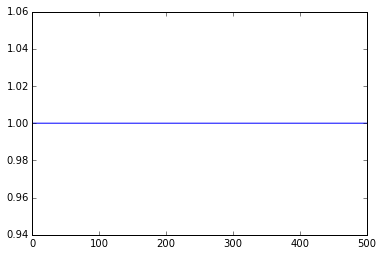

In [28]:
#redefine critical densities for Big Crunch universe
OmegaR = 0.0001
OmegaM = 4.9
OmegaL = -0.3
Omega0 = OmegaM + OmegaL + OmegaR

#time of crunch
#tCrunch = (np.pi*Omega0)/(H0*((Omega0-1)**(1.5)))*3.17e-17
tCrunch = 500
#print tCrunch/2

#define time array containing values for which to solve
timeCrunch1 = np.linspace(0, tCrunch, 100*tCrunch + 1, endpoint=True)
print timeCrunch1

#define aDot
def aDot(A, timeCrunch1): 
    return H0*((OmegaR/(A**2)+OmegaM/A+OmegaL*(A**2)+(1-Omega0))**(0.5))

#define scale factor array
scale = integrate.odeint(aDot, 1.0000001, timeCrunch1)

print scale

#plot
plt.plot(timeCrunch1, scale)
plt.show()

#2

If we take a spherical isothermal galaxy cluster to be our graviationally lensing object and place it at distances $D_l$ away from the observer and $D_{ls}$ from the object being lensed, for a total distance from observer to source of $D_s$, and if the actual angle from the center of the lens to the object from the observer's view is $\beta$, then the angle at which the object is observed will be $\theta=\beta+\alpha$ where $\alpha$ is the increase in angular position. We are interested in objects that produce Einstein rings at $\theta=\theta_E=(\frac{4GM}{c^2}\frac{D_{ls}}{D_lD_s})^{1/2}$, so we want to consider the lensing effects from all massive objects in the sphere spanning the Einstein radius. In doing so we want to show that the velocity dispersion of the lensing galaxies $\sigma_v\approx10^3\frac{km}{s}(\frac{\theta}{28"}\frac{D_s}{D_{ls}})^{1/2}$. In other words we want to show that $\sigma_v\approx10^3\frac{km}{s}$ when $D_s\approx2D_{ls}$ and $\theta\approx14"=7$ $10^{-5}$rad. Using the small angle approximation, we can say that the radius of this sphere is $R\approx\theta{D_l}$. We find the mass within this sphere by first considering the mass density of an isothermal sphere $\rho=\frac{\sigma_v^2}{2{\pi}Gr^2}$. From this the surface mass of a plane perpendicular to the line of sight of the observer is $\Sigma(R)=\frac{\sigma_v^2}{2GR}$. Integrating over the entire sphere yields a total mass of $M(R)=\frac{{\pi}\sigma_v^2R}{G}$. This gives us a deflection angle of $\alpha=4\pi\frac{\sigma_V^2}{c^2}\frac{D_{ls}}{D_s}$. Since we are interested only in objects that create Einstein rings, they are directly behind our lens and $\beta=0$. It then follows that

$\alpha=\theta$

$4\pi\frac{\sigma_V^2}{c^2}\frac{D_{ls}}{D_s}=(\frac{4GM}{c^2}\frac{D_{ls}}{D_lD_s})^{1/2}$

$4\pi\frac{\sigma_v^4}{c^2}\frac{D_{ls}}{D_s}=\frac{GM}{D_l}$

Substituting in our expression for $M(R)$ and our conditions that $D_s\approx2D_{ls}\approx2D_l$ and $\frac{R}{D_l}=\theta\approx7$ $10^{-5}$rad gives

$4\frac{\sigma_v^2}{c^2}\frac{D_l}{2D_l}=\frac{R}{D_l}$

$2\frac{\sigma_v^2}{c^2}=\theta$

$\sigma_v=\sqrt{\frac{\theta}{2}}c\approx10^3\frac{km}{s}$